# Ahmed Mostafa MLND Capstone
## Image Captioning Project
My Capstone prohect is based on the COCO Dataset. The Microsoft **C**ommon **O**bjects in **CO**ntext (MS COCO) dataset is a large-scale dataset for scene understanding.  The dataset is commonly used to train and benchmark object detection, segmentation, and captioning algorithms.  

![Sample Dog Output](images/coco-examples.jpg)

You can read more about the dataset on the [website](http://cocodataset.org/#home) or in the [research paper](https://arxiv.org/pdf/1405.0312.pdf).


## 1- Initialization

In [65]:
import os
import sys
import glob
import pickle
import nltk

#sys.path.append('/opt/cocoapi/PythonAPI')
from pycocotools.coco import COCO
from tqdm import tqdm
from PIL import Image

import numpy as np
import pandas as pd
import skimage.io as io
import matplotlib.pyplot as plt

from keras.applications import InceptionResNetV2, InceptionV3, VGG16, VGG19
from keras.preprocessing import sequence, image
from keras.preprocessing.image import img_to_array, load_img, array_to_img, DirectoryIterator, image
from keras.models import Sequential
from keras.layers import LSTM, Embedding, TimeDistributed, Dense, RepeatVector, merge, Activation, Flatten
from keras.layers.wrappers import Bidirectional
from keras.optimizers import Adam, RMSprop

%matplotlib inline

## 1.1- Initialize Directories

In [40]:
# initialize COCO API for instance annotations
dataDir = 'F:\\COCO\\datasets'
annotationsDir = 'annotations'
trainDataDir = 'train'
valDataDir = 'val'
year = '2017'

In [51]:
def get_annotations_coco(ml_type='val', data_type='instances', year='2017'):
    if ml_type != 'train' and ml_type != 'val':
        raise ValueError('get_annotations_coco ml_type accepts only "train" or "val" values only.')
    if data_type != 'instances' and data_type != 'captions':
        raise ValueError('get_annotations_coco data_type accepts only "instances" or "captions" values only.')
        
    annFile = os.path.join(dataDir, os.path.join(annotationsDir, data_type + '_{}.json'.format(ml_type+year)))
    print("Annotations of {0} {1} Dataset: {2}".format(ml_type, data_type, annFile))
    return COCO(annFile)

## 1.2- Initialize COCO for Instances Annotations

In [54]:
ann_coco_instances_train = get_annotations_coco('train','instances','2017')

Annotations of train instances Dataset: F:\COCO\datasets\annotations\instances_train2017.json
loading annotations into memory...
Done (t=19.88s)
creating index...
index created!


In [55]:
ann_coco_instances_val = get_annotations_coco('val','instances','2017')

Annotations of val instances Dataset: F:\COCO\datasets\annotations\instances_val2017.json
loading annotations into memory...
Done (t=0.75s)
creating index...
index created!


## 1.3- Initialize COCO for Captions Annotations

In [56]:
ann_coco_captions_train = get_annotations_coco('train', 'captions','2017')

Annotations of train captions Dataset: F:\COCO\datasets\annotations\captions_train2017.json
loading annotations into memory...
Done (t=1.35s)
creating index...
index created!


In [57]:
ann_coco_captions_val = get_annotations_coco('val', 'captions','2017')

Annotations of val captions Dataset: F:\COCO\datasets\annotations\captions_val2017.json
loading annotations into memory...
Done (t=0.14s)
creating index...
index created!


## 2- Create Dictionary containing all captions for each image

In [67]:
#get image IDs from directory
def buildImageCaptionMap(ml_type='train', year='2017'):
    # List all files in ml-type directory (val or train)
    # Convert file names to integer Ids
    # Return a dict containing image-id with all its captions 
    pass

## 3- Test with single image

In [60]:
# get image ids 
instance_ids = list(ann_coco_instances_val.anns.keys())
print("count of instance ids = {0}".format(len(instance_ids)))

count of instance ids = 36781


In [61]:
# pick a random image and obtain the corresponding URL
instance_id = np.random.choice(instance_ids)
print('selected instance id is {0}'.format(instance_id))
print(coco_instances_val.anns[instance_id])

selected instance id is 143337
{'bbox': [299.37, 253.21, 46.31, 25.84], 'iscrowd': 0, 'category_id': 3, 'segmentation': [[315.95, 253.21, 326.26, 253.21, 330.44, 253.21, 334.03, 253.21, 338.21, 256.79, 340.45, 259.63, 341.2, 260.23, 344.04, 260.23, 345.53, 263.36, 345.68, 268.89, 345.68, 271.13, 345.68, 272.03, 343.89, 275.16, 341.2, 276.51, 340.3, 276.96, 340.45, 277.7, 339.85, 278.6, 338.81, 278.6, 337.46, 278.0, 337.31, 276.36, 337.16, 275.76, 330.89, 275.91, 330.74, 276.96, 328.8, 277.41, 326.26, 276.96, 326.26, 275.91, 326.26, 275.46, 316.85, 275.61, 316.1, 278.75, 314.61, 279.05, 311.62, 278.75, 310.42, 277.11, 309.83, 275.02, 309.38, 274.72, 305.05, 274.12, 305.05, 276.06, 303.85, 276.51, 301.46, 276.36, 300.86, 275.46, 300.12, 274.27, 299.37, 273.37, 299.52, 271.43, 299.52, 270.09, 299.82, 268.44, 299.97, 266.35, 299.67, 265.01, 301.01, 262.17, 302.51, 261.87, 304.0, 261.27, 305.49, 260.38, 306.54, 258.43, 307.88, 256.19, 309.53, 254.1]], 'area': 932.6561500000001, 'id': 143337

In [62]:
# pick a random image and obtain the corresponding URL
instance_img_id = coco_instances_val.anns[instance_id]['image_id']
instance_imgs = coco_instances_val.loadImgs(instance_img_id)
print(instance_imgs)
instance_img = instance_imgs[0]
print(instance_img)

[{'height': 431, 'id': 563653, 'file_name': '000000563653.jpg', 'license': 3, 'date_captured': '2013-11-17 01:51:50', 'flickr_url': 'http://farm9.staticflickr.com/8442/7894511186_6e2bde5055_z.jpg', 'coco_url': 'http://images.cocodataset.org/val2017/000000563653.jpg', 'width': 640}]
{'height': 431, 'id': 563653, 'file_name': '000000563653.jpg', 'license': 3, 'date_captured': '2013-11-17 01:51:50', 'flickr_url': 'http://farm9.staticflickr.com/8442/7894511186_6e2bde5055_z.jpg', 'coco_url': 'http://images.cocodataset.org/val2017/000000563653.jpg', 'width': 640}


http://images.cocodataset.org/val2017/000000563653.jpg


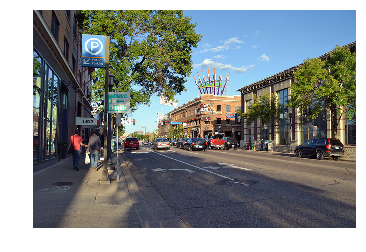

In [63]:
# print URL and visualize corresponding image
url = instance_img['coco_url']
print(url)

I = io.imread(url)
plt.axis('off')
plt.imshow(I)
plt.show()

In [64]:
# load and display captions
annotation_Ids = coco_captions_val.getAnnIds(imgIds=instance_img['id']);
annotations = coco_captions_val.loadAnns(annotation_Ids)
coco_captions_val.showAnns(annotations)

A street going trough the center of a small town.
A street scene with cars on the road and people on the sidewalk.
A large shadow is cast upon a busy street
some buildings some trees people and cars and signs
A quiet city street shows buildings, cars, and people.


## 4- 

In [ ]:
# load images into keras
